#  Neural Network Implementations :

- In this Section we are developing simple but very effecirent neural network and then at the end of that we will train this model for one example and try to predict and get accuracy.






## Imoprting necessary framework : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Getting Network shape from Input and Output :

In [2]:
def network_shape(X, Y):
    n_x = X.shape[0] 
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

## Initialize Parameter W and b :

In [3]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    assert (W1.shape == (n_h, n_x)),"error at W1 size"
    assert (b1.shape == (n_h, 1)),"error at b1 size"
    assert (W2.shape == (n_y, n_h)),"error at W2 size"
    assert (b2.shape == (n_y, 1)),"error at b2 size"
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

## Sigmoid function :

In [4]:
def sigmoid(Z):
    A = 1/( 1 + np.exp(-Z))
    return A

## Feature normailze with limit [0, 1]

In [5]:
def feature_normalization(X):
    (row, col) = X.shape
    for f in range(row):
        
        X[f,:] = (X[f,:]- min(X[f,:].T))/(max(X[f,:].T)- min(X[f,:].T))
    
    assert(X.shape==(row,col)),"Error in size match : feature_normalization"
    return X

## Forward propogation : 

In [6]:
def forward_prop(X, parameters):
    # Retrieve each parameter W and b
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]    
    #  calculate A2
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

## Compute Cost for sigmoid function :

In [7]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y))
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    
    return cost

## Back propogation :

In [8]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    # First, retrieve W1 and W2
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    # Retrieve also A1 and A2
    A1 = cache["A1"]
    A2 = cache["A2"]
    # Backward prop: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    assert(A2.shape==Y.shape),"Error at backprop, A2 is not same size as Y"
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2),np.multiply(A1,(1-A1)))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1, axis=1)/m
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

## Gradient descent update rule :

In [14]:
def update_parameters(parameters, grads, learning_rate = 0.8):
    # Retrieve each parameter
    W1 = parameters["W1"] 
    b1 = parameters["b1"] 
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Retrieve each gradient
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

## Predict function :

In [15]:
def predict(parameters, X):
    A2, cache = forward_prop(X, parameters)
    predictions = 1*(A2 > 0.5)
    return predictions

## Neural network model :

In [16]:
def nn_model(X, Y, n_h, num_iterations = 1000, show_cost=False):
    n_x,n_h,n_y = network_shape(X, Y)
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    # retrieve W1, b1, W2, b2.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    # Loop is for gradient descent Iteration
    for i in range(0, num_iterations):
        
        # Forward prop
        A2, cache = forward_prop(X, parameters)
        # Cost-function
        cost = compute_cost(A2, Y, parameters)
        # Backprop
        grads = backward_propagation(parameters, cache, X, Y)
        # Gradient descent parameter update
        parameters = update_parameters(parameters, grads)
        
        if show_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

## Load example data to train :

Cost after iteration 0: 0.694957
Cost after iteration 100: 0.660026
Cost after iteration 200: 0.562804
Cost after iteration 300: 0.372082
Cost after iteration 400: 0.266999
Cost after iteration 500: 0.227692
Cost after iteration 600: 0.210864
Cost after iteration 700: 0.202493
Cost after iteration 800: 0.197831
Cost after iteration 900: 0.194970
Cost after iteration 1000: 0.193047
Cost after iteration 1100: 0.191635
Cost after iteration 1200: 0.190510
Cost after iteration 1300: 0.189545
Cost after iteration 1400: 0.188660
Cost after iteration 1500: 0.187781
Cost after iteration 1600: 0.186800
Cost after iteration 1700: 0.185509
Cost after iteration 1800: 0.183539
Cost after iteration 1900: 0.180400
Cost after iteration 2000: 0.175607
Cost after iteration 2100: 0.168889
Cost after iteration 2200: 0.160516
Cost after iteration 2300: 0.151617
Cost after iteration 2400: 0.143513
Cost after iteration 2500: 0.136621
Cost after iteration 2600: 0.130740
Cost after iteration 2700: 0.125600
Cost

C:\Users\Harsh Chaudhari\Anaconda2\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


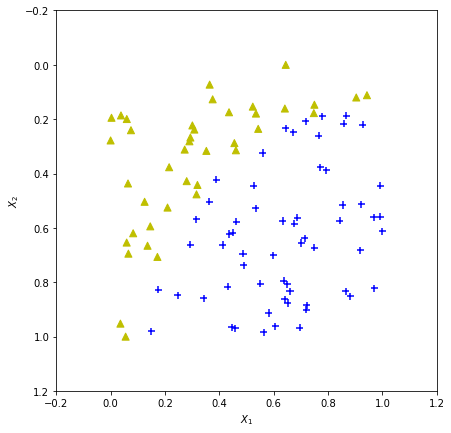

In [17]:
def loadData():
    ''' Loading data as X as features and Y as labels
    from our data file and convert it to matrix '''
    Z = []
    file = open("ex2data1.txt", "r") 
    for line in file:
        line = line.split(',')
        Z.append(line)
    Z = np.matrix(Z, dtype=float)
    (j, k) = Z.shape
    X = np.zeros((j,k),dtype=float)
    Y = np.zeros((j,1),dtype=float)
    Y_prediction = np.zeros((1,j),dtype=float)
    for i in range(j):
        X[i,0]= Z[i,0]
        X[i,1]= Z[i,0]**(1/2.0)
        X[i,2]= Z[i,1]
        Y[i,0]=Z[i,2]
    X = np.matrix(X)
    X = X.T ## Make this X with shape of (4,47)
    Y = Y.T ## Make this Y with shape of (1,47)
    ##print X


    ''' Calling all necessary function that needed for
    training and getting results and here we use only
    four hidden layers '''
    n_h = 4
    X = feature_normalization(X)
    parameters = nn_model(X, Y, n_h, num_iterations = 4000, show_cost=True)
    predictions = predict(parameters, X)
    predictions = np.matrix(predictions)
    #print Y-predictions
    assert(predictions.shape == Y.shape),"Error at predictions"
    y_hat = np.power((predictions-Y),2)
    print "Total number of Error : ",np.sum(y_hat.T,axis = 0)# Showing unsucessfullty predicted


    ''' Visualizing our result with data.
    Here red is positive labels and
    green is negative labels'''
    f, ax = plt.subplots(figsize=(10, 7))
    x1 = np.array(X[0,:]).flatten()
    x2 = np.array(X[2,:]).flatten()
    y = np.array(predictions[0,:]).flatten()
    y1 = 1-y
    y2 = y_hat
    ax.scatter(x1, x2,y*50,marker='+',c="b")
    ax.scatter(x1, x2,y1*50,marker='^',c="y")
    ax.set(aspect="equal",
           xlim=(-0.2, 1.2), ylim=(1.2, -0.2),
           xlabel="$X_1$", ylabel="$X_2$")
    f.show()

loadData()